# Data Collection and Analysis
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, "html.parser")

In [5]:
# Extract all rows of data
table = soup.find('table')
# table

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
emp_list = []

# Loop through the scraped data to create a list of rows
# Extract headers
headers = [header.text.strip() for header in table.find('tbody').find('tr').find_all('th')]

# Extract rows
rows = table.find('tbody').find_all('tr')
for row in rows:
    # Extract row data
    row_data = [data.text.strip() for data in row.find_all('td')]
    
    # Check if row_data is empty or if number of columns in row_data matches number of headers
    if len(row_data) == 0 or len(row_data) != len(headers):
        # Print headers and row_data for debugging
        print(f"Headers: {headers}")
        print(f"Row data: {row_data}")
        print(f"Skipping row due to column mismatch or empty row.")
        continue
    
    # Create dictionary for each row
    table_dict = {headers[i]: row_data[i] for i in range(len(headers))}
    
    # Append dictionary to emp_list
    emp_list.append(table_dict)

# # Print the list of dictionaries
# print(emp_list[0])


Headers: ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
Row data: []
Skipping row due to column mismatch or empty row.


In [7]:
emp_list[0]

{'id': '2',
 'terrestrial_date': '2012-08-16',
 'sol': '10',
 'ls': '155',
 'month': '6',
 'min_temp': '-75.0',
 'pressure': '739.0'}

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(emp_list, columns=headers)

In [9]:
# df.head()

In [10]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [12]:
# Change data types for data analysis

# Convert 'id' column to object

df['id'] = df['id'].astype(str)

# Convert 'terrestrial_date' to datetime

df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])


# Convert 'id', 'sol', 'ls', and 'month' to integer

int_columns = ['sol', 'ls', 'month']
df[int_columns] = df[int_columns].astype(int)

# Convert 'min_temp' and 'pressure' to float

float_columns = ['min_temp', 'pressure']
df[float_columns] = df[float_columns].astype(float)





In [13]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [14]:
# 1. How many months are there on Mars?
month_counts = df['month'].value_counts().sort_index()
month_counts

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64

In [15]:
# 2. How many Martian days' worth of data are there?
martian_days_count = len(df)
martian_days_count

1867

In [16]:
# 3. What is the average low temperature by month?
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()
avg_min_temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

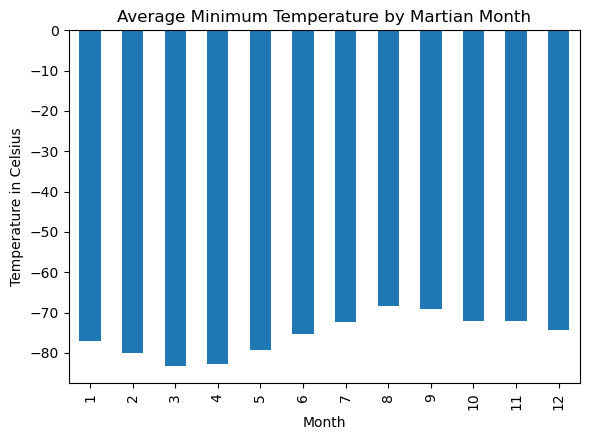

In [17]:
# Plot the average temperature by month

plt.figure(figsize=(6, 4.5))
avg_min_temp_by_month.plot(kind='bar')
plt.title('Average Minimum Temperature by Martian Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.xticks(rotation = 90, fontsize = 10)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('Data_Outputs/MartianTemp.png')
plt.show()

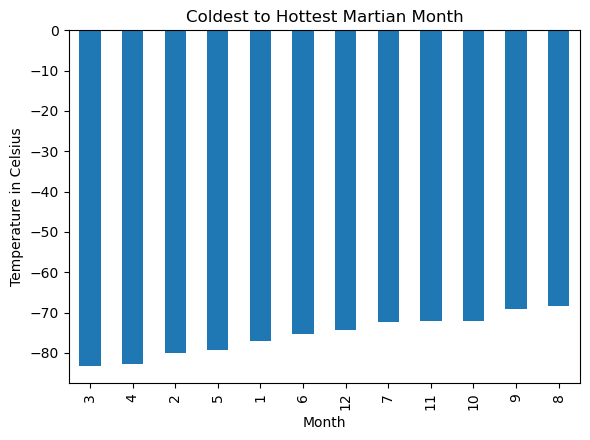

In [18]:
# Identify the coldest and hottest months in Curiosity's location

# Sort DataFrame by 'month'
avg_min_temp_by_month = avg_min_temp_by_month.sort_values()

# Plotting the bar chart
plt.figure(figsize=(6, 4.5))
avg_min_temp_by_month.plot(kind='bar', x='month', y='min_temp', legend=None)

plt.title('Coldest to Hottest Martian Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.xticks(rotation=90, fontsize=10)

plt.tight_layout()

# Save figure if needed
plt.savefig('Data_Outputs/ColdestToHotest.png')

plt.show()

In [19]:
# 4. Average pressure by Martian month

# Group by 'month' and calculate average pressure
avg_pressure_by_month = df.groupby('month')['pressure'].mean() #.reset_index()

# Display the DataFrame to verify
avg_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

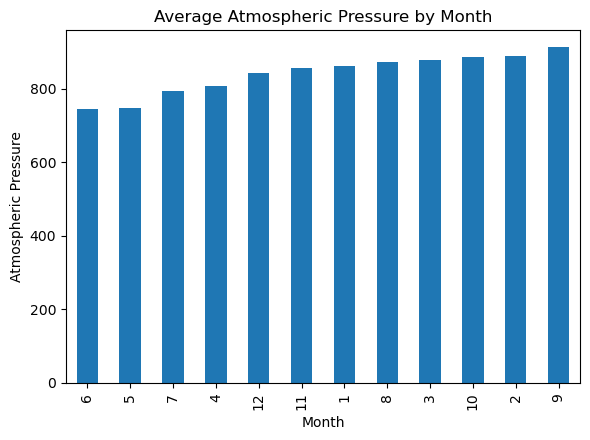

In [20]:
# Plot the average pressure by month

# Plotting the bar chart
plt.figure(figsize=(6, 4.5))

sorted_pressure_month = avg_pressure_by_month.sort_values()

sorted_pressure_month.plot(kind='bar', x='month', y='pressure', legend=None)
# plt.plot(avg_pressure_by_month['month'], avg_pressure_by_month['pressure'], color='lightgreen')

plt.title('Average Atmospheric Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.xticks(rotation=90)

plt.tight_layout()

# Save figure if needed
plt.savefig('Data_Outputs/MartianPressure.png')

plt.show()

In [21]:
# import numpy as np

# # Add random jitter to sol for hazy effect
# jitter = np.random.normal(scale=5, size=len(df))  # Adjust scale as needed
# df['sol_jittered'] = df['sol'] + jitter

# # Plotting
# plt.figure(figsize=(10, 6))
# plt.scatter(df['sol'], df['min_temp'], label='Minimum Temperature')
# temp_df['min_temp'].plot(x='sol',y='min_temp')
# plt.xticks(np.arange(0, len(temp_df), 100))
# #plt.figure(figsize=(100,60))
# plt.show()

In [22]:
# Plotting
# plt.figure(figsize=(6, 4.5))
# plt.scatter(df['sol'], df['min_temp'], label='Minimum Temperature', marker='o')
# plt.title('Minimum Temperature on Mars vs. Number of Terrestrial Days')
# plt.xlabel('Number of Terrestrial Days')
# plt.ylabel('Minimum Temperature (°C)')


# plt.tight_layout()
# plt.show()


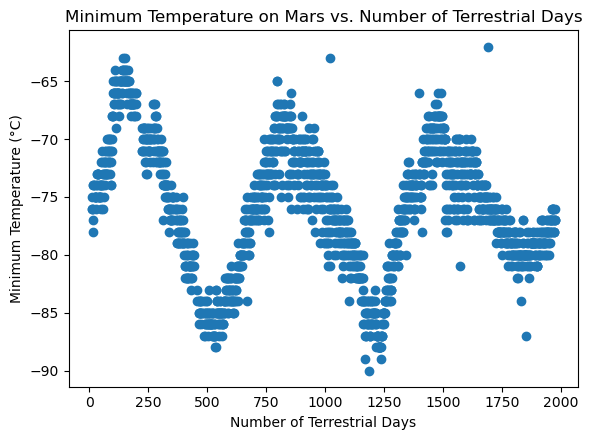

In [23]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.figure(figsize=(6, 4.5))
plt.scatter(df['sol'], df['min_temp'], label='Minimum Temperature', marker='o')
plt.title('Minimum Temperature on Mars vs. Number of Terrestrial Days')
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature (°C)')


plt.tight_layout()

# Save figure if needed
plt.savefig('Data_Outputs/terrestrialdays.png')

plt.show()


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [24]:
# Write the data to a CSV

import os

df2 = pd.DataFrame(df)

# Create the directory if it doesn't exist
output_directory = "Data_Outputs"
os.makedirs(output_directory, exist_ok=True)

# Define the output file path
output_file = os.path.join(output_directory, "mars_weather_data.csv")

# Write DataFrame to CSV
df2.to_csv(output_file, index=False)

In [25]:
browser.quit()